<b>Pandas

É uma biblioteca open-source do eco-sistema Scipy para análise de dados.

<b> Series

É um obj uni-dimensional similar ao ndarray do numpy ou a lista do python

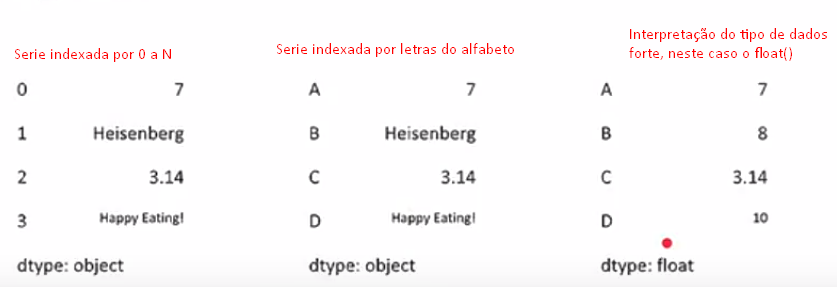

<b> DataFrames <b>

DataFrame
Um DataFrame é uma estrutura de dados tabular composta de linhas e colunas, similar a uma planilha excel, tabela de conjunto de dados, ou objeto data.frame do R. Podemos também olhar para o DataFrame como um grupo de Series que compartilham um indice.

In [3]:
# importando pandas
import pandas as pd

data = {'year': [2010, 2011, 2012, 2011, 2012, 2010, 2011, 2012],
        'team': ['Bears', 'Bears', 'Bears', 'Packers', 'Packers', 'Lions', 'Lions', 'Lions'],
        'wins': [11, 8, 10, 15, 11, 6, 10, 4],
        'losses': [5, 8, 6, 1, 5, 10, 6, 12]}
football = pd.DataFrame(data)
football

,losses,team,wins,year
0,5,Bears,11,2010
1,8,Bears,8,2011
2,6,Bears,10,2012
3,1,Packers,15,2011
4,5,Packers,11,2012
5,10,Lions,6,2010
6,6,Lions,10,2011
7,12,Lions,4,2012


In [5]:
import numpy as np
pd.DataFrame(np.random.randint(low=0, high=10, size=(5, 7)),
             columns=['a', 'b', 'c', 'd', 'e', 'f','g'])

,a,b,c,d,e,f,g
0,3,6,2,9,6,7,4
1,1,2,1,8,5,1,0
2,4,5,5,5,6,4,7
3,0,3,5,6,9,8,9
4,7,8,7,3,6,6,8


In [6]:
pd.DataFrame?

<b>Lendo Arquivos CSV

Uma forma muito mais comum é de ler um conjunto de dados persistido no disco em algum formato de panilha. Por exemplo, .csv e .xlsx. Felizmente, pandas provê meios de fazer isso de forma muito fácil e intuitiva.

In [8]:
file_path = "iris-dataset.csv"

df = pd.read_csv(file_path, 
                 header=None,
                 names=['sepal_length', 
                        'sepal_width', 
                        'petal_length', 
                        'petal_width', 
                        'species'])

In [10]:
#df -> Inteiro
#df.head(10) #10 primeiras
df.tail(10) #10 ultimas

,sepal_length,sepal_width,petal_length,petal_width,species
140,6.7,3.1,5.6,2.4,Iris-virginica
141,6.9,3.1,5.1,2.3,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


<b>Estatísticas Básicas

In [11]:
df.describe() #Descreve atravez de algumas estatisticas basicas nosso conj. de dados
#mean -> Media
#std -> Desvio padrao
#25% a 75% quartiz

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Por padrão, a função describe só mostra as estatísticas de colunas numéricas, como pode ser observado no exemplo anterior. Vamos então forçá-la a mostrar as estatísticas da coluna categórica (species).

In [14]:
df.describe(include="all")
#unique = Unico
#top = Valor Frequente

df.describe(include="object") #apenas nao numericos
df.describe(include="number") #apenas numericos

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [15]:
df.shape #Dimensoes da tabela

(150, 5)

In [16]:
df.columns #Colunas

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [17]:
df.index #Valores do indices

RangeIndex(start=0, stop=150, step=1)

In [40]:
df.sepal_length.tail(10)

#df['sepal_length'].tail(10)
df[df.columns[1]].tail(10)

sum(df[df.columns[1]].tail(10))
np.sum(df[df.columns[1]].tail(10))

30.3

In [46]:
df.sepal_length.head(10) * df.sepal_width.head(10)

0    17.85
1    14.70
2    15.04
3    14.26
4    18.00
5    21.06
6    15.64
7    17.00
8    12.76
9    15.19
dtype: float64

<b>Transformando pd.DataFrame em np.ndarray

In [47]:
df.as_matrix()

array([[5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
       [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [4.6, 3.1, 1.5, 0.2, 'Iris-setosa'],
       [5.0, 3.6, 1.4, 0.2, 'Iris-setosa'],
       [5.4, 3.9, 1.7, 0.4, 'Iris-setosa'],
       [4.6, 3.4, 1.4, 0.3, 'Iris-setosa'],
       [5.0, 3.4, 1.5, 0.2, 'Iris-setosa'],
       [4.4, 2.9, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.1, 1.5, 0.1, 'Iris-setosa'],
       [5.4, 3.7, 1.5, 0.2, 'Iris-setosa'],
       [4.8, 3.4, 1.6, 0.2, 'Iris-setosa'],
       [4.8, 3.0, 1.4, 0.1, 'Iris-setosa'],
       [4.3, 3.0, 1.1, 0.1, 'Iris-setosa'],
       [5.8, 4.0, 1.2, 0.2, 'Iris-setosa'],
       [5.7, 4.4, 1.5, 0.4, 'Iris-setosa'],
       [5.4, 3.9, 1.3, 0.4, 'Iris-setosa'],
       [5.1, 3.5, 1.4, 0.3, 'Iris-setosa'],
       [5.7, 3.8, 1.7, 0.3, 'Iris-setosa'],
       [5.1, 3.8, 1.5, 0.3, 'Iris-setosa'],
       [5.4, 3.4, 1.7, 0.2, 'Iris-setosa'],
       [5.1, 3.7, 1.5, 0.4, 'Iris-setosa'],
       [4.6, 3.6, 1.0, 0.2, 'Iri

In [48]:
df['species'].as_matrix()

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [4]:
import pandas as pd

data = {'year': [2010, 2011, 2012, 2011, 2012, 2010, 2011, 2012],
        'team': ['Bears', 'Bears', 'Bears', 'Packers', 'Packers', 'Lions', 'Lions', 'Lions'],
        'wins': [11, 8, 10, 15, 11, 6, 10, 4],
        'losses': [5, 8, 6, 1, 5, 10, 6, 12]}
df = pd.DataFrame(data, columns=['year', 'team', 'wins', 'losses'])
df

,year,team,wins,losses
0,2010,Bears,11,5
1,2011,Bears,8,8
2,2012,Bears,10,6
3,2011,Packers,15,1
4,2012,Packers,11,5
5,2010,Lions,6,10
6,2011,Lions,10,6
7,2012,Lions,4,12


In [5]:
df[['team', 'year']]

,team,year
0,Bears,2010
1,Bears,2011
2,Bears,2012
3,Packers,2011
4,Packers,2012
5,Lions,2010
6,Lions,2011
7,Lions,2012


In [6]:
'''
import pandas as pd
s = pd.Series([7, '53', 3.14, -1789710578, '4.3'], dtype=float)
print(s[1])
'''

df['nova_coluna'] = df['wins'] - df['losses'] #Criando uma nova coluna

df.apply(lambda x:x['wins'] - x['losses'], axis=1)

df['diff'] = df.apply(lambda x:x['wins'] - x['losses'], axis=1)

df


,year,team,wins,losses,nova_coluna,diff
0,2010,Bears,11,5,6,6
1,2011,Bears,8,8,0,0
2,2012,Bears,10,6,4,4
3,2011,Packers,15,1,14,14
4,2012,Packers,11,5,6,6
5,2010,Lions,6,10,-4,-4
6,2011,Lions,10,6,4,4
7,2012,Lions,4,12,-8,-8


In [13]:
df['a'] = (df['wins'] - df['losses'])**2
df['b'] = df.apply(lambda x: x['wins'] - x['losses'], axis=1)
df['c'] = df.apply(lambda x:(x['wins'] - x['losses'])**2, axis=1)
df['e'] = df['wins'] - df['losses']

df.apply(lambda x:(x['wins'] - x['losses'])**2, axis=1)
df

,year,team,wins,losses,nova_coluna,diff,a,b,c,e
0,2010,Bears,11,5,6,6,36,6,36,6
1,2011,Bears,8,8,0,0,0,0,0,0
2,2012,Bears,10,6,4,4,16,4,16,4
3,2011,Packers,15,1,14,14,196,14,196,14
4,2012,Packers,11,5,6,6,36,6,36,6
5,2010,Lions,6,10,-4,-4,16,-4,16,-4
6,2011,Lions,10,6,4,4,16,4,16,4
7,2012,Lions,4,12,-8,-8,64,-8,64,-8


In [56]:
df.drop('nova_coluna', axis=1) #Remover coluna na visualização apenas
df.drop('nova_coluna', axis=1, inplace=True) #Remover coluna realmente
df 

,year,team,wins,losses
0,2010,Bears,11,5
1,2011,Bears,8,8
2,2012,Bears,10,6
3,2011,Packers,15,1
4,2012,Packers,11,5
5,2010,Lions,6,10
6,2011,Lions,10,6
7,2012,Lions,4,12


In [57]:
df.drop(5,axis=0) #Remover linha do resultado

,year,team,wins,losses
0,2010,Bears,11,5
1,2011,Bears,8,8
2,2012,Bears,10,6
3,2011,Packers,15,1
4,2012,Packers,11,5
6,2011,Lions,10,6
7,2012,Lions,4,12


<b>Indexação por linhas

Há vários modos de fazer indexação por linhas no pandas. Um dos mais comuns é via indexação booleana (similar ao numpy). Essa abortagem é muito utilizada para filtrar valores.

In [59]:
import numpy as np

# criando array de falses com mesmo tamanho
# do dataframe
idx = np.zeros(df.shape[0], dtype=bool)

# como todos os indices são falsos
# vou ter como resposta um dataframe vazio
df[idx]

,year,team,wins,losses


In [60]:
# criando array de trues com mesmo tamanho
# do dataframe
idx = np.ones(df.shape[0], dtype=bool)

# como todos os indices são falsos
# vou ter como resposta um dataframe vazio
df[idx]

,year,team,wins,losses
0,2010,Bears,11,5
1,2011,Bears,8,8
2,2012,Bears,10,6
3,2011,Packers,15,1
4,2012,Packers,11,5
5,2010,Lions,6,10
6,2011,Lions,10,6
7,2012,Lions,4,12


In [61]:
# calculando média com método nativo do DataFrame
mean_wins = df['wins'].mean()

# gerando indices booleanos
idx = df['wins'] < mean_wins #Valores abaixo da m[edia geral]

# imprimindo algumas infos
print("Media da largura da sepala :", mean_wins)
print("Total de elementos apos filtro:", df[idx].shape[0])

df[idx]

Media da largura da sepala : 9.375
Total de elementos apos filtro: 3


,year,team,wins,losses
1,2011,Bears,8,8
5,2010,Lions,6,10
7,2012,Lions,4,12


In [62]:
# calculando média com método nativo do DataFrame
mean_wins = df['wins'].mean()
mean_losses = df['losses'].mean()

# gerando indices booleanos
idx = (df['wins'] < mean_wins) & \
            ~(df['losses'] < mean_losses) #N'ao tiveram derrotas abaixo da media

# imprimindo algumas infos
print("Media da largura da sepala :", mean_wins)
print("Media da largura da sepala :", mean_losses)
print("Total de elementos após filtragem:", df[idx].shape[0])

df[idx]

Media da largura da sepala : 9.375
Media da largura da sepala : 6.625
Total de elementos após filtragem: 3


,year,team,wins,losses
1,2011,Bears,8,8
5,2010,Lions,6,10
7,2012,Lions,4,12


<b> Exercicio

Crie um pandas.DataFrame para cada time. Utilize a técnica de filtragem mostrada anteriormente.

In [66]:
## exercício
## a função unique() retorna todos os valore unicos para um pd.DataFrame
df.team.unique()

array(['Bears', 'Packers', 'Lions'], dtype=object)

In [76]:
tipos = df.team.unique()
tipos

for i in range(tipos.size):
    print(df[df['team'] == tipos[i]], '\n')

   year   team  wins  losses
0  2010  Bears    11       5
1  2011  Bears     8       8
2  2012  Bears    10       6 

   year     team  wins  losses
3  2011  Packers    15       1
4  2012  Packers    11       5 

   year   team  wins  losses
5  2010  Lions     6      10
6  2011  Lions    10       6
7  2012  Lions     4      12 



<b> Método Loc

A função loc nos permite fazer indexação como o numpy no eixo das linhas da tabela.

In [78]:
df.loc[[0, 1, 2]]

,year,team,wins,losses
0,2010,Bears,11,5
1,2011,Bears,8,8
2,2012,Bears,10,6


In [79]:
df.loc[0:3] # diferente do python, ela inclui o ultimo elemento

,year,team,wins,losses
0,2010,Bears,11,5
1,2011,Bears,8,8
2,2012,Bears,10,6
3,2011,Packers,15,1


In [80]:
df.index

RangeIndex(start=0, stop=8, step=1)

In [86]:
# por exemplo, não vai aceitar o indexação negativa
#df.loc[-1]
df.index[-1] #Obtem o último índice

df.loc[df.index[-1]] #Obtém o último elemento
df.loc[df.index[::-1]] #Obtém do último elemento ao primeiro

,year,team,wins,losses
7,2012,Lions,4,12
6,2011,Lions,10,6
5,2010,Lions,6,10
4,2012,Packers,11,5
3,2011,Packers,15,1
2,2012,Bears,10,6
1,2011,Bears,8,8
0,2010,Bears,11,5


In [87]:
df.index = pd.RangeIndex(-df.shape[0], 0, 1) #Altera indexação para ser negativa
df

,year,team,wins,losses
-8,2010,Bears,11,5
-7,2011,Bears,8,8
-6,2012,Bears,10,6
-5,2011,Packers,15,1
-4,2012,Packers,11,5
-3,2010,Lions,6,10
-2,2011,Lions,10,6
-1,2012,Lions,4,12


In [88]:
df.loc[-3:-1]

,year,team,wins,losses
-3,2010,Lions,6,10
-2,2011,Lions,10,6
-1,2012,Lions,4,12


In [89]:
# resetando index
df.index = pd.RangeIndex(0, df.shape[0])
df.loc[df.index[-4:-1]]

,year,team,wins,losses
4,2012,Packers,11,5
5,2010,Lions,6,10
6,2011,Lions,10,6


In [90]:
indices = df.index[-4:-1]
print("indices:", df.index[-4:-1])

df.loc[indices, "wins"]

indices: RangeIndex(start=4, stop=7, step=1)


4    11
5     6
6    10
Name: wins, dtype: int64

In [91]:
df.loc[df.index[-4:-1], ["wins", "losses"]]

,wins,losses
4,11,5
5,6,10
6,10,6


In [93]:
#df.loc[df.isnull(), ["wins", "losses"]] --> Avaliar na net

<b> Transformação

A função apply é utiliziada muitas vezes para fazer a transformação sobre as colunas do nosso DataFrame

In [98]:
file_path = "iris-dataset.csv"

df = pd.read_csv(file_path, 
                 header=None,
                 names=['sepal_length', 
                        'sepal_width', 
                        'petal_length', 
                        'petal_width', 
                        'species'])

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [96]:
def format_species_name(val, delimiter):
    # remova Iris- do nome
    val = val.split(delimiter)[-1]
    # Deixe a primeira letra maiúscula
    val = val.title()
    return val

# "aplicando" uma função sobre 
# todos os elementos de um pd.Series
df.species.apply(format_species_name, args=('-'))

0         Setosa
1         Setosa
2         Setosa
3         Setosa
4         Setosa
5         Setosa
6         Setosa
7         Setosa
8         Setosa
9         Setosa
10        Setosa
11        Setosa
12        Setosa
13        Setosa
14        Setosa
15        Setosa
16        Setosa
17        Setosa
18        Setosa
19        Setosa
20        Setosa
21        Setosa
22        Setosa
23        Setosa
24        Setosa
25        Setosa
26        Setosa
27        Setosa
28        Setosa
29        Setosa
         ...    
120    Virginica
121    Virginica
122    Virginica
123    Virginica
124    Virginica
125    Virginica
126    Virginica
127    Virginica
128    Virginica
129    Virginica
130    Virginica
131    Virginica
132    Virginica
133    Virginica
134    Virginica
135    Virginica
136    Virginica
137    Virginica
138    Virginica
139    Virginica
140    Virginica
141    Virginica
142    Virginica
143    Virginica
144    Virginica
145    Virginica
146    Virginica
147    Virgini

Similarmente a função map do python, a apply aplica a cada elemento da pd.Series uma função e retorna uma nova pd.Series como os valores alterados de acordo com a função.

Note que apesar de ter feito isso, eu não alterei meu DataFrame.

In [97]:
df.species = df.species.apply(format_species_name, args=('-'))
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [100]:
df.tail(10)

,sepal_length,sepal_width,petal_length,petal_width,species
140,6.7,3.1,5.6,2.4,Iris-virginica
141,6.9,3.1,5.1,2.3,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [101]:
df.species.str.replace("Iris-", "").str.title()

0         Setosa
1         Setosa
2         Setosa
3         Setosa
4         Setosa
5         Setosa
6         Setosa
7         Setosa
8         Setosa
9         Setosa
10        Setosa
11        Setosa
12        Setosa
13        Setosa
14        Setosa
15        Setosa
16        Setosa
17        Setosa
18        Setosa
19        Setosa
20        Setosa
21        Setosa
22        Setosa
23        Setosa
24        Setosa
25        Setosa
26        Setosa
27        Setosa
28        Setosa
29        Setosa
         ...    
120    Virginica
121    Virginica
122    Virginica
123    Virginica
124    Virginica
125    Virginica
126    Virginica
127    Virginica
128    Virginica
129    Virginica
130    Virginica
131    Virginica
132    Virginica
133    Virginica
134    Virginica
135    Virginica
136    Virginica
137    Virginica
138    Virginica
139    Virginica
140    Virginica
141    Virginica
142    Virginica
143    Virginica
144    Virginica
145    Virginica
146    Virginica
147    Virgini

<b>Axis 0 ou index

É o eixo das linhas, quando assinalamos axis=0 nos métodos que tenham essa opção, nós estamos dizendo que as operações devem ser executadas no sentido das linhas. Vejamos o exemplo com a função mean para ficar mais claro

In [102]:
df.mean(axis=0)
# df.mean(axis='index') Mesmo resultado

sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
dtype: float64

In [103]:
df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].\
    apply(lambda x: x.mean(), axis=0) #Media de todas as linhas

sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
dtype: float64

<b>Axis 1 ou Axis columns

É o eixo das colunas, quando assinalamos axis=1 métodos que tenham essa opção, nós estamos dizendo que as operações devem ser executadas coluna-a-coluna. Vejamos o exemplo com a função mean para ficar mais claro.

In [105]:
#df.mean(axis=1).head() #Duas formas de fazer a mesma coisa (Por conj de colunas de um elemento)
df.mean(axis='columns').head()

0    2.550
1    2.375
2    2.350
3    2.350
4    2.550
dtype: float64

É claro que o método `apply` nos permite fazer operações muito mais complexas que o apply. 
Por exemplo, muitas vezes queremos deixar os valores de nossas colunas numa mesma escala, para facilitar a comparação entre os valores. Vamos dizer que queremos deixar todos os valores entre 0 e 1.

Para isso vamos fazer o seguinte:

$x_i^{scale} = \frac{x_i}{\max(X)}$

In [106]:
df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].\
    apply(lambda x: (x) / (x.max()) ,  axis=1).\
    head()  # o head é só para não mostrar todo dataframe

,sepal_length,sepal_width,petal_length,petal_width
0,1.0,0.686275,0.274510,0.039216
1,1.0,0.612245,0.285714,0.040816
2,1.0,0.680851,0.276596,0.042553
3,1.0,0.673913,0.326087,0.043478
4,1.0,0.720000,0.280000,0.040000


In [111]:
#sentido das linhas
df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].\
    apply(lambda x: (x) / (x.max()) ,  axis=0).\
    head() # o head é só para não mostrar todo dataframe

,sepal_length,sepal_width,petal_length,petal_width
0,0.645570,0.795455,0.202899,0.08
1,0.620253,0.681818,0.202899,0.08
2,0.594937,0.727273,0.188406,0.08
3,0.582278,0.704545,0.217391,0.08
4,0.632911,0.818182,0.202899,0.08


<b>GroupBy

Simular do GroupBy do SQL

In [113]:
#df.groupby("species") > Groupby object
df.groupby("species").mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [115]:
df.groupby("species").std() #Desvio Padrão
df.groupby("species").sum() # Soma

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,250.3,170.9,73.2,12.2
Iris-versicolor,296.8,138.5,213.0,66.3
Iris-virginica,329.4,148.7,277.6,101.3


<b>Chamando várias funções de agregação

In [117]:
df.groupby("species").agg(['max', 'min'])

sepal_length      sepal_width      petal_length       \
                         max  min         max  min          max  min   
species                                                                
Iris-setosa              5.8  4.3         4.4  2.3          1.9  1.0   
Iris-versicolor          7.0  4.9         3.4  2.0          5.1  3.0   
Iris-virginica           7.9  4.9         3.8  2.2          6.9  4.5   

                petal_width       
                        max  min  
species                           
Iris-setosa             0.6  0.1  
Iris-versicolor         1.8  1.0  
Iris-virginica          2.5  1.4

<b> Funções de Agregação Personalizadas

In [122]:
def media(x):
    return x.mean()

#df.groupby("species").agg(lambda x: x.mean())
df.groupby("species").agg(media)

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [124]:
df.groupby("species").agg({
        'sepal_width': 'mean', 
        #'petal_width': np.sum,
        'petal_width': lambda x: x.mean(),
    })

,sepal_width,petal_width
species,,
Iris-setosa,3.418,0.244
Iris-versicolor,2.770,1.326
Iris-virginica,2.974,2.026


<b> Iterando sobre os grupos

In [136]:
for key, group in df.groupby("species"):
    #print(key, group)
    print(key, group.shape)

print("")
#Equivalente a 
for especies in df.species.unique():
    print(key, df[df.species == especies].shape)

Iris-setosa (50, 5)
Iris-versicolor (50, 5)
Iris-virginica (50, 5)

Iris-virginica (50, 5)
Iris-virginica (50, 5)
Iris-virginica (50, 5)


#### Mesclando tabelas

O pandas provê a função merge, que nos permite mesclar duas tabelas levando em conta o valor de uma ou mais colunas.

```python
pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False)
```

In [137]:
import pandas as pd 

left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                         'A': ['A0', 'A1', 'A2', 'A3'],
                         'B': ['B0', 'B1', 'B2', 'B3']})


right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                          'C': ['C0', 'C1', 'C2', 'C3'],
                          'D': ['D0', 'D1', 'D2', 'D3']})

print(left)
print("")
print(right)

    A   B key
0  A0  B0  K0
1  A1  B1  K1
2  A2  B2  K2
3  A3  B3  K3

    C   D key
0  C0  D0  K0
1  C1  D1  K1
2  C2  D2  K2
3  C3  D3  K3


In [138]:
pd.merge(left, right, on="key") #Equivalente ao InnerJoin

,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A1,B1,K1,C1,D1
2,A2,B2,K2,C2,D2
3,A3,B3,K3,C3,D3


In [139]:
        left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                         'key2': ['K0', 'K1', 'K0', 'K1'],
                         'A': ['A0', 'A1', 'A2', 'A3'],
                         'B': ['B0', 'B1', 'B2', 'B3']})
    

right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                          'key2': ['K0', 'K0', 'K0', 'K0'],
                          'C': ['C0', 'C1', 'C2', 'C3'],
                          'D': ['D0', 'D1', 'D2', 'D3']})

print(left)
print("")
print(right)

    A   B key1 key2
0  A0  B0   K0   K0
1  A1  B1   K0   K1
2  A2  B2   K1   K0
3  A3  B3   K2   K1

    C   D key1 key2
0  C0  D0   K0   K0
1  C1  D1   K1   K0
2  C2  D2   K1   K0
3  C3  D3   K2   K0


In [140]:
pd.merge(left, right, on=['key1', 'key2'])

,A,B,key1,key2,C,D
0,A0,B0,K0,K0,C0,D0
1,A2,B2,K1,K0,C1,D1
2,A2,B2,K1,K0,C2,D2


#### Métodos de Mesclagem

| Método | SQL Join         
| :- |:--------:
| left | LEFT OUTER JOIN
| right | RIGHT OUTER JOIN
| outer | FULL OUTER JOIN
| inner | INNER JOIN

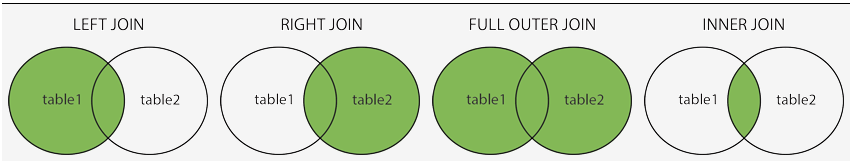

\**imagem tirada de (https://www.w3schools.com/sql/sql_join.asp)*

<b>Left Join

In [141]:
print(left)
print("")
print(right)

    A   B key1 key2
0  A0  B0   K0   K0
1  A1  B1   K0   K1
2  A2  B2   K1   K0
3  A3  B3   K2   K1

    C   D key1 key2
0  C0  D0   K0   K0
1  C1  D1   K1   K0
2  C2  D2   K1   K0
3  C3  D3   K2   K0


In [142]:
pd.merge(left, right, how='left', on=['key1', 'key2'])

,A,B,key1,key2,C,D
0,A0,B0,K0,K0,C0,D0
1,A1,B1,K0,K1,NaN,NaN
2,A2,B2,K1,K0,C1,D1
3,A2,B2,K1,K0,C2,D2
4,A3,B3,K2,K1,NaN,NaN


<b>Right Join

In [143]:
pd.merge(left, right, how='right', on=['key1', 'key2'])

,A,B,key1,key2,C,D
0,A0,B0,K0,K0,C0,D0
1,A2,B2,K1,K0,C1,D1
2,A2,B2,K1,K0,C2,D2
3,NaN,NaN,K2,K0,C3,D3


<b>Outer Join

In [144]:
pd.merge(left, right, how='outer', on=['key1', 'key2'])

,A,B,key1,key2,C,D
0,A0,B0,K0,K0,C0,D0
1,A1,B1,K0,K1,NaN,NaN
2,A2,B2,K1,K0,C1,D1
3,A2,B2,K1,K0,C2,D2
4,A3,B3,K2,K1,NaN,NaN
5,NaN,NaN,K2,K0,C3,D3


In [146]:
pd.merge(pd.merge(left, right, how='outer', on=['key1', 'key2']), left, on=['key1', 'key2']) #GroupBy encadeado

,A_x,B_x,key1,key2,C,D,A_y,B_y
0,A0,B0,K0,K0,C0,D0,A0,B0
1,A1,B1,K0,K1,NaN,NaN,A1,B1
2,A2,B2,K1,K0,C1,D1,A2,B2
3,A2,B2,K1,K0,C2,D2,A2,B2
4,A3,B3,K2,K1,NaN,NaN,A3,B3


<b>Matplotlib

Matplotlib é uma biblioteca Python para traçar gráficos 2D que produz figuras de qualidade em vários formatos distintos

Podendo ser utilizado em:

- Scripts Python
- IPyhthon Shell
- Jupter Notebook etc;

Mais baixo nível

Praticamente, todas as bibliotecas de visualização estatística, tais como seaborn, plotnine entre outras, são construídas utilizando rotinas do Matplotlib.

Exemplos: https://matplotlib.org/gallery.html

#### Seaborn
É uma biblioteca de vizualização do Python baseada no Matplotlib

Integra com pandas DataFrame

PESQUISAR: Diferença entre Seaborn e Plotnine

##### Plotnine
É uma implementação de uma gramática de gráficos em Python,baseada no ggplot2. -> R 

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd

%matplotlib inline 
#Função mágica que permite que o Jupter Notebook crie o 
#grafico como resultado, caso o comando deja o ultimo da linha sem a necesidade de utilizar a função: plt.show()

np.random.seed(123)

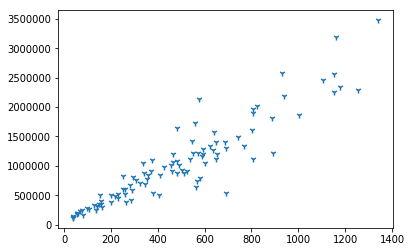

In [5]:
X = np.abs(np.random.normal(60, 500, 100))[:, np.newaxis] 
X[X <= 40] = 40
w = 2000
y = X * (w - np.random.normal(0, 500, X.shape[0]))[:, np.newaxis] + 60000

plt.scatter(X, y, marker="1")
#plt.scatter([1,2,3,1.2,3], [1,2,3,1.2,-10], marker="1")
#plt.scatter? -> Documentação

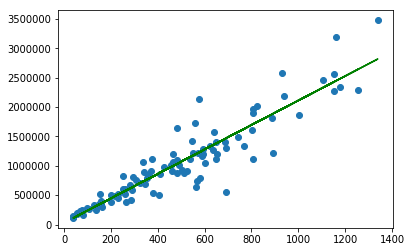

In [6]:
X_l = np.hstack((np.ones((X.shape[0], 1)), X))

#Estima a inclinação da reta com metodo dos minimos quadrados
b, w = np.linalg.inv(X_l.T.dot(X_l)).dot(X_l.T).dot(y).ravel()

plt.scatter(X, y)
#Linha verde com x mais intercessão no eixo vezes os valors de X
plt.plot(X, w*X + b, color="green")

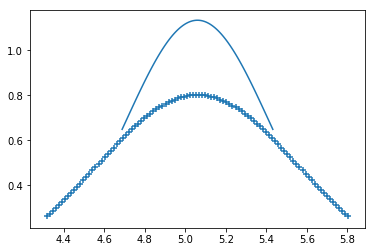

In [7]:
mu = 5.06
mu_2 = 5.06
varianca = 0.124
varianca_2 = 0.248
sigma = np.sqrt(varianca)
sigma_2 = np.sqrt(varianca_2)
x = np.linspace(mu - 3*varianca, mu + 3*varianca, 100)
x_2 = np.linspace(mu_2 - 3*varianca_2, mu_2 + 3*varianca_2, 100)

# plotando uma distribuição normal
plt.plot(x, stats.norm(mu, sigma).pdf(x))
plt.scatter(x_2, stats.norm(mu_2, sigma_2).pdf(x_2), marker="+")

#stats.norm?

### Plotnine

Plotnine é uma implementação de uma [grámaticas de gráficos](https://www.amazon.com/Grammar-Graphics-Statistics-Computing/dp/0387245448/ref=as_li_ss_tl?ie=UTF8&qid=1477928463&sr=8-1&keywords=the+grammar+of+graphics&linkCode=sl1&tag=ggplot2-20&linkId=f0130e557161b83fbe97ba0e9175c431) em Python, é baseada no [ggplot2](http://ggplot2.tidyverse.org/reference/). A gramática nos permite compor gráficos mapeando explicitamente dados aos objetos visuais compõe o gráfico.

Traçar gráficos com uma gramática é poderoso, ela torna gráficos personalizados, muitas vezes complexos, fácil de se imaginar e criá-los, enquanto os gráficos simples se mantém simples.

Basicamente, você provê o dado, dizendo ao plotnine como mapeá-los a elementos estéticos, quais primitivas gráficas utilizar, e ele cuida dos detalhes técnicos.

#### O que é gramática de gráficos?

A ideia básica é: independemente especificar *building blocks* do gráfico e combiná-los para criar qualquer tipo de gráfico. Os building blocks são:

- dados
- mapa estético
- objeto geométrico
- transformação estatística
- escalas
- sistemas de cooredenadas
- ajustes de posição
- faceting

Plotnine trabalha apenas com DataFrame

In [8]:
from plotnine import *

X = np.abs(np.random.normal(60, 500, 100))[:, np.newaxis] 
X[X <= 40] = 40
w = 2000
y = X * (w - np.random.normal(0, 500, X.shape[0]))[:, np.newaxis] + 60000

df = pd.DataFrame(np.hstack((X, y)), columns=['area', 'preco'])

df.head()

C:\Users\clmo\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


,area,preco
0,411.655059,7.258408e+05
1,239.052666,6.371913e+05
2,1160.351050,2.763126e+06
3,404.148465,7.448046e+05
4,56.846375,1.777861e+05


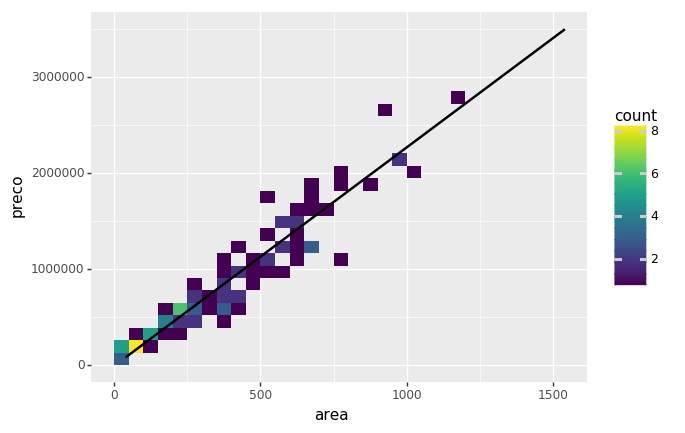

<ggplot: (47773881706)>

In [9]:
(ggplot(df, aes(x = 'area', y = 'preco')) +
geom_bin2d() + geom_smooth(method='lm', se = False))

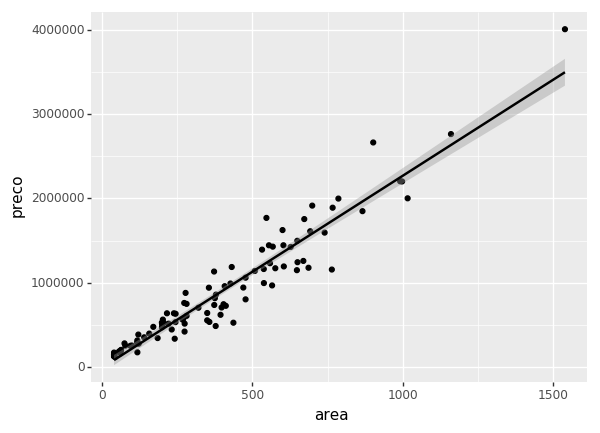

<ggplot: (-9223372029864137689)>

In [24]:
(ggplot(df, aes(x = 'area', y = 'preco')) + 
     geom_point()  +
    geom_smooth(method='lm', se = True))

### Mapa Estétisco

No plotnine(ggplot) estéticos (a.k.a. aesthetic) significa tudo que você pode ver. Por exemplo:

- posição (i.e., nos eixos x e y)
- cor (color) 
- preenchimento (fill)
- formato dos pontos (shape)
- tipo da linha (linetype)
- tamanho (size)

In [12]:
iris = pd.read_csv('iris-dataset.csv', 
                 header=None,
                 names=['sepal_length', 
                        'sepal_width', 
                        'petal_length', 
                        'petal_width', 
                        'species'])

iris.tail(10)

,sepal_length,sepal_width,petal_length,petal_width,species
140,6.7,3.1,5.6,2.4,Iris-virginica
141,6.9,3.1,5.1,2.3,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


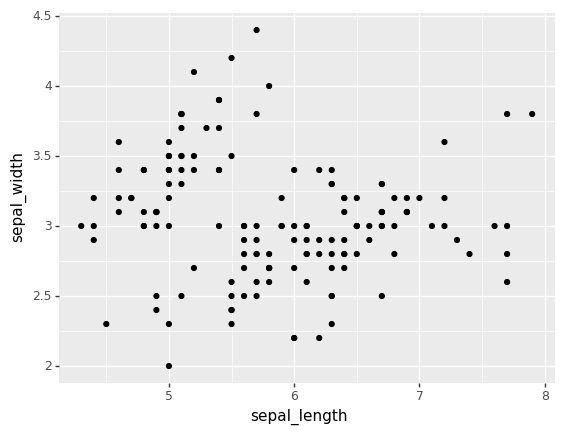

<ggplot: (-9223372029864017036)>

In [26]:
ggplot(iris, aes(x='sepal_length',
                 y='sepal_width')) + geom_point() 

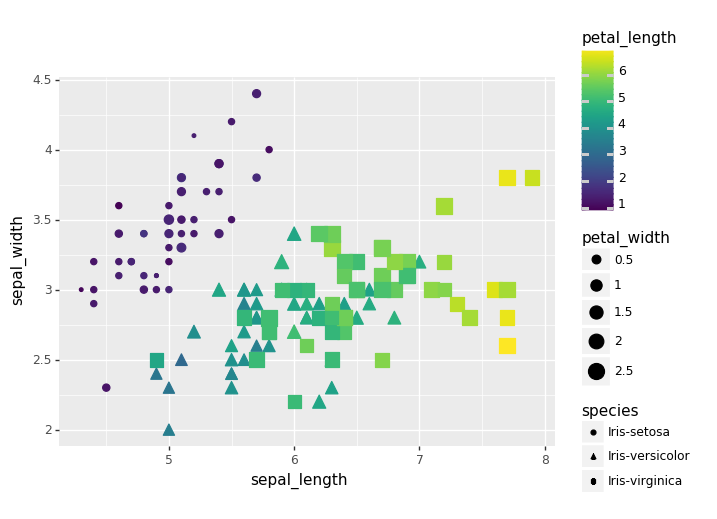

<ggplot: (6990737307)>

In [32]:
# adcione os seguintes aesthetic: size='petal_width', shape='species', color="petal_width"
ggplot(iris, aes(x='sepal_length',
                 y='sepal_width', 
                 color='petal_length',
                size='petal_width',
                shape='species')) + geom_point() #incluir cor para categoria

### Objectos Geométricos (geom)

Objetos geométricos são o que é de fato traçado. Exemplos são:

- pontos (geom_point, para gráficos de dispersão)
- linhas (geom_line, para time series, tendências, etc)
- boxplot (geom_boxplot)

Um gráfico deve ter pelo menos um geom; não quantidade máxima. Você pode adicionar geom ao seu gráfico com operador **+** .

Você pode listar os objetos geométricos disponíveis abaixo:

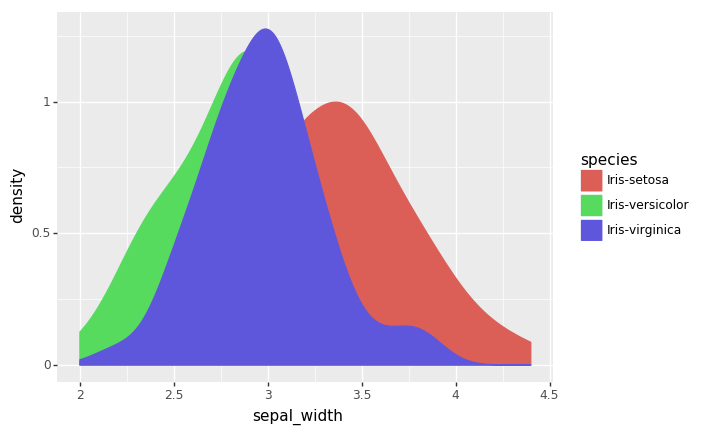

<ggplot: (47776028904)>

In [13]:
ggplot(iris, aes(x='sepal_width',
                 fill='species',
                 color='species')) + geom_density()

In [14]:
ggplot(iris, aes(x = 'sepal_length',
                 y= 'sepal_width',
                color='species',
                fill='species')) + geom_density_2d()

NameError: name 'geom_density_2d' is not defined

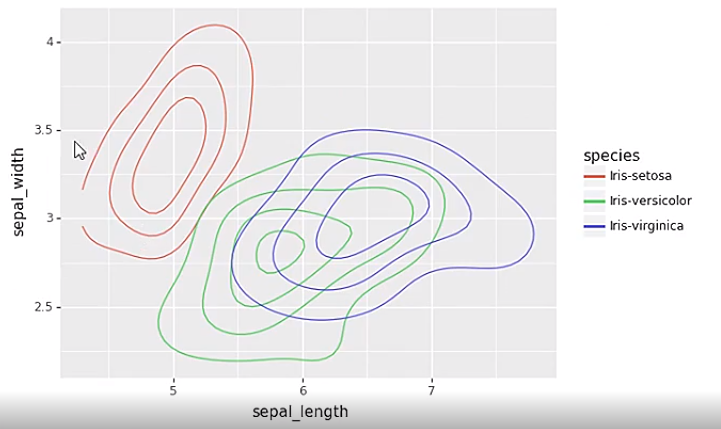

### Boxplot

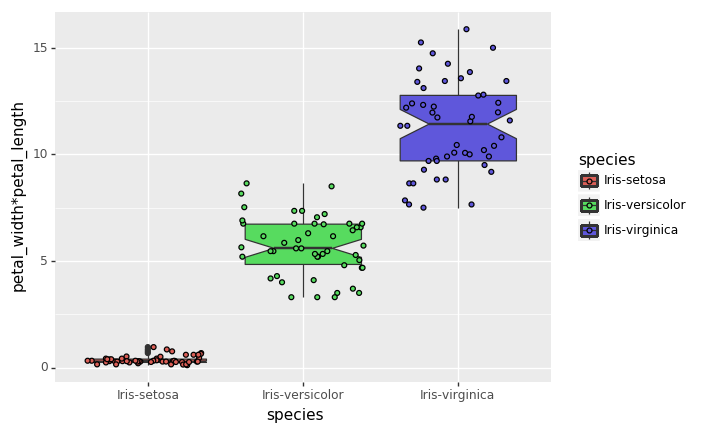

<ggplot: (-9223371989078606055)>

In [17]:
(ggplot(iris, aes(x='species',
                 y='petal_width*petal_length', #pode utilizar expressões
                 fill='species')) + 
geom_boxplot(notch=True) + #bloco por quartis
geom_jitter()) #pontos

#Grafico mostra quartis onde a linha preta representa o limite de 50% dos valores da amostra

#### Violin plot

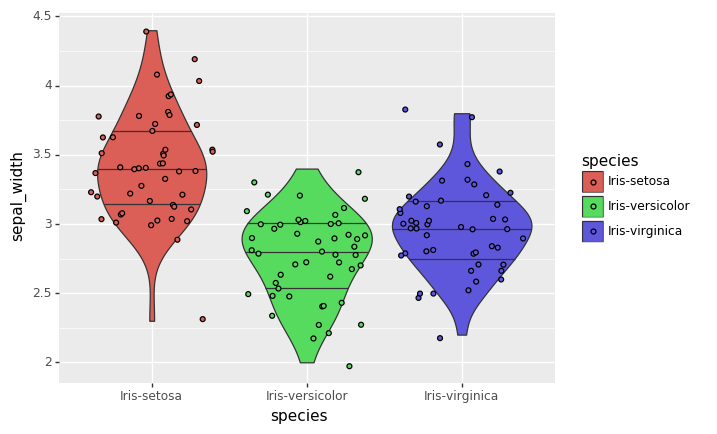

<ggplot: (47776298900)>

In [18]:
(ggplot(iris, aes(x='species',
                 y='sepal_width',
                 fill='species')) + 
geom_violin(draw_quantiles=(0.25, 0.5, 0.75)) + 
geom_jitter())

#### Faceting

In [19]:
(ggplot(iris, aes(x='sepal_length',
                      y='petal_width', 
                      color='species')) + 
geom_density_2d() +
facet_wrap('~species')) #Colunas categoricas

NameError: name 'geom_density_2d' is not defined

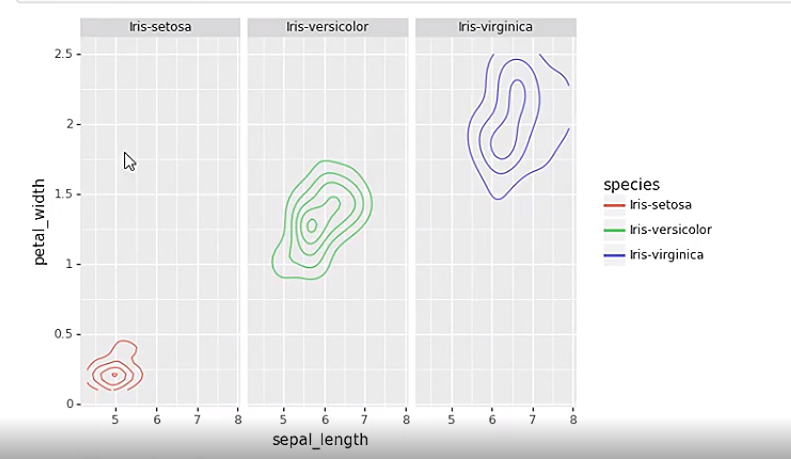

`facet_grid` fomar uma matriz de paineis definida pela colunas e linhas. É mais util quando se há duas variáveis discretas, e todas as combinações delas existem no dado.

In [20]:
iris['species1'] = iris.species
(ggplot(iris, aes(x='sepal_length',
                      y='petal_width', 
                      color='species')) + 
geom_density_2d() +
facet_grid('species1~species'))

NameError: name 'geom_density_2d' is not defined

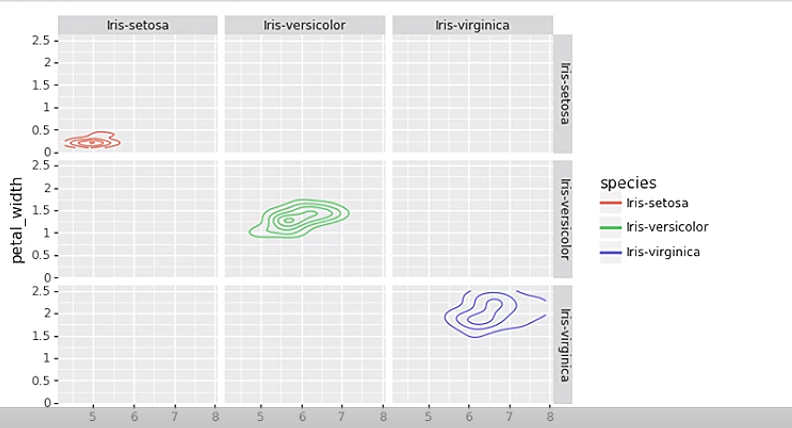